In [2]:
import pandas as pd

In [55]:
import matplotlib.pyplot as plt

In [79]:
import numpy as np

# Filtro desertores sistema regular
Deserción del sistema regular: considera a los estudiantes que se salieron del sistema escolar de niños y jóvenes, aun cuando hayan continuado sus estudios en el sistema de adultos. De básica y media.

In [3]:
m2018 = pd.read_csv('data/matriculas/2018/m2018.csv', sep=';')
m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3969867569.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  m2018 = pd.read_csv('data/matriculas/2018/m2018.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3969867569.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')


/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3710420452.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Sexo [2018] - [2019]


,Sexo,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Sin información,3,0.000106,0,0.000000
1,Hombre,1442524,50.881981,45903,57.705507
2,Mujer,1392512,49.117913,33644,42.294493


Gráfico de torta: Sexo alumnos regulares [2018] - [2019]


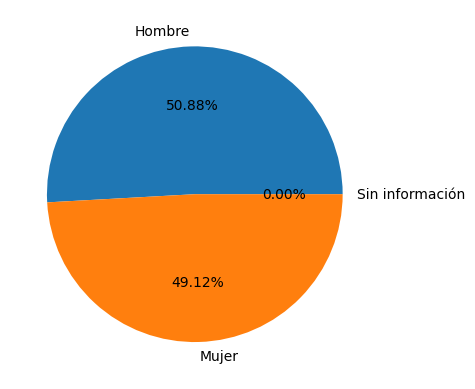

Gráfico de torta: Sexo alumnos desertores [2018] - [2019]


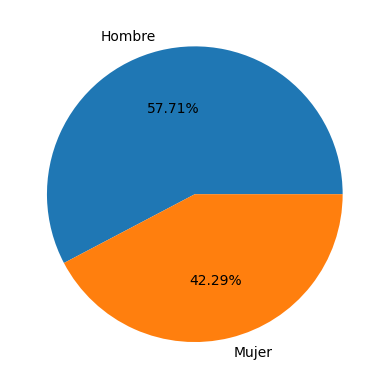

Rural [2018] - [2019]


,RURAL_RBD,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Urbano,2608537,92.010621,75283,94.639647
1,Rural,226502,7.989379,4264,5.360353


Gráfico de torta: Ruralidad alumnos regulares [2018] - [2019]


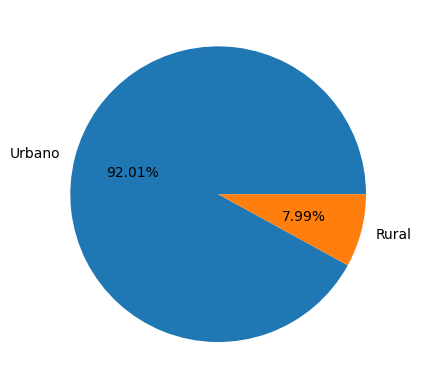

Gráfico de torta: Ruralidad alumnos desertores [2018] - [2019]


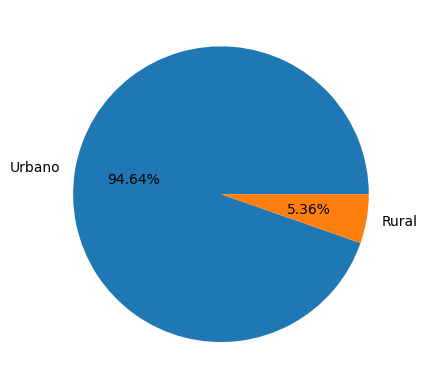

Dependencia [2018] - [2019]


,COD_DEPE,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Municipal,317775,11.208841,16220,20.390461
1,Particular Subvencionado,676760,23.871277,24216,30.442380
2,Particular Pagado,1484527,52.363548,29205,36.714144


Alumnos regulares: [2018] - [2019]


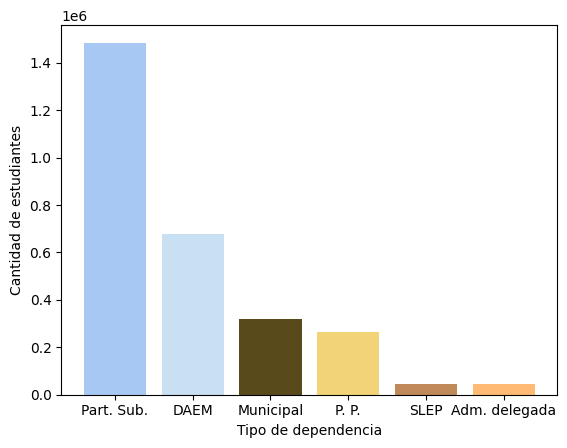

Alumnos desertores: [2018] - [2019]


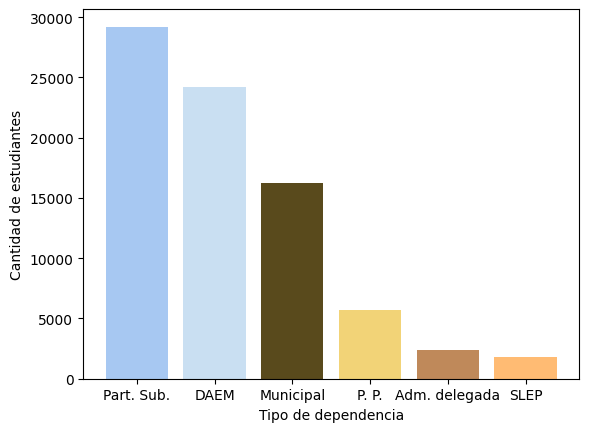

Tipo de enseñanza agrupados [2018] - [2019]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica,1955090.0,68.961662,37483.0,47.120570
1,Media CH,640119.0,22.578843,28215.0,35.469597
2,Media TP y Art,239830.0,8.459496,13849.0,17.409833


Alumnos regulares: [2018] - [2019]


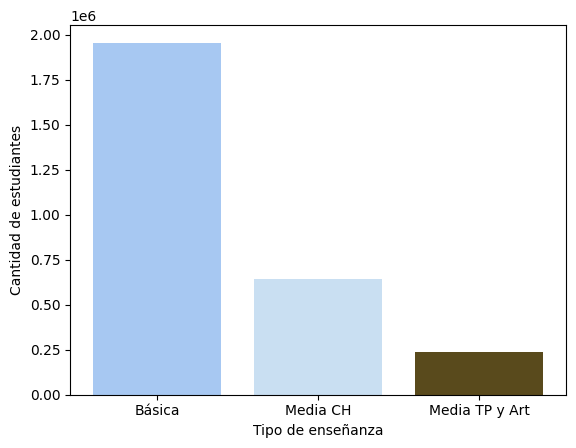

Alumnos desertores: [2018] - [2019]


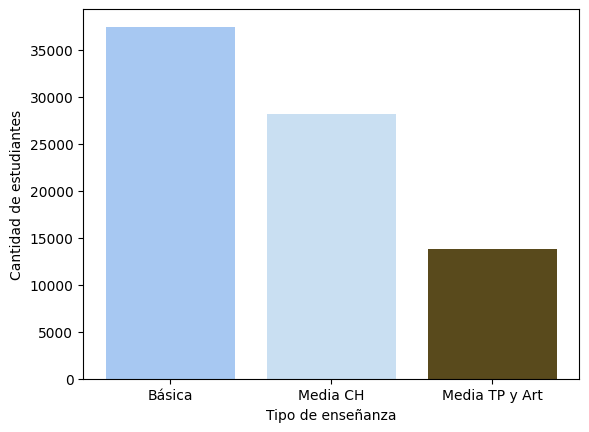

Estudiantes Educación Básica [2018] - [2019]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica 1º,233675,8.242391,4678,5.880800
1,Básica 2º,248337,8.759562,4162,5.232127
2,Básica 3º,253218,8.931729,3798,4.774536
3,Básica 4º,250580,8.838679,3419,4.298088
4,Básica 5º,251882,8.884604,3636,4.570883
5,Básica 6º,245047,8.643514,4213,5.296240
6,Básica 7º,241039,8.502141,5296,6.657699
7,Básica 8º,231312,8.159041,8281,10.410198


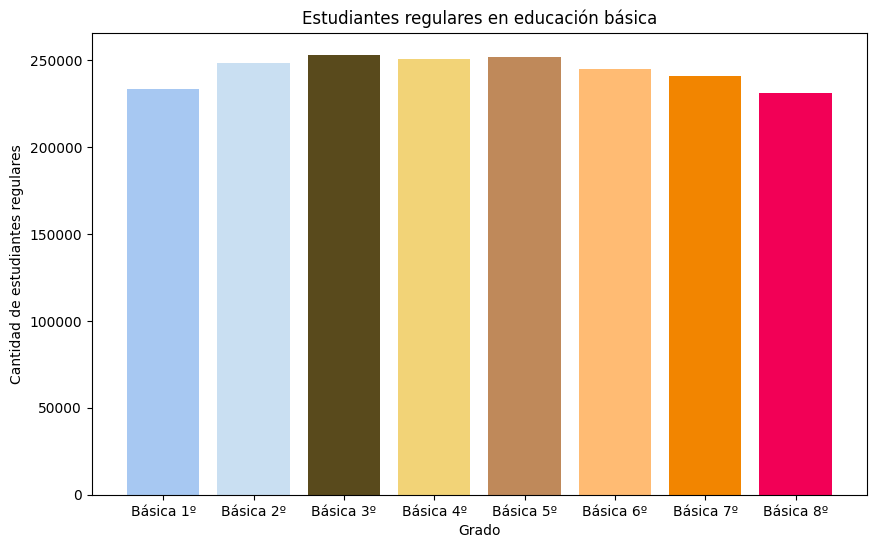

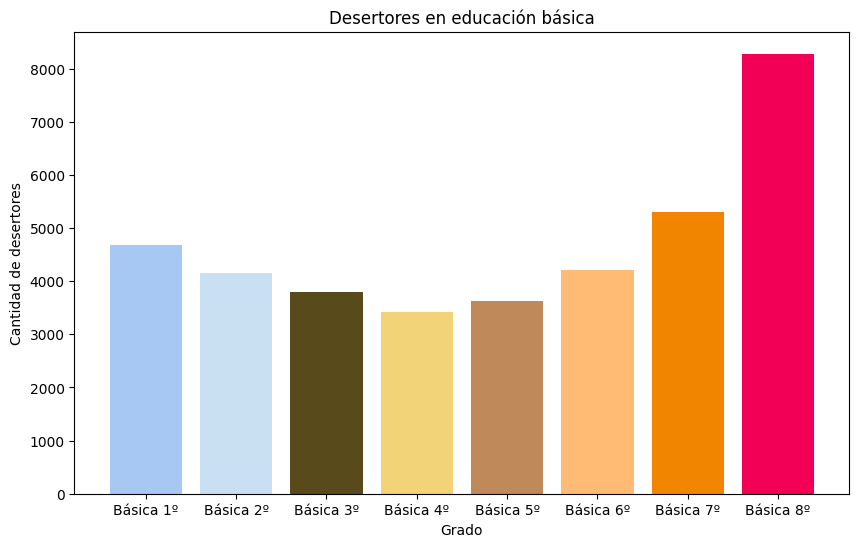

,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Medio 1º,240825,8.494592,14260,17.926509
1,Medio 2º,222888,7.861902,14582,18.331301
2,Medio 3º,218923,7.722045,13222,16.621620
3,Medio 4º,197313,6.959798,0,0.000000


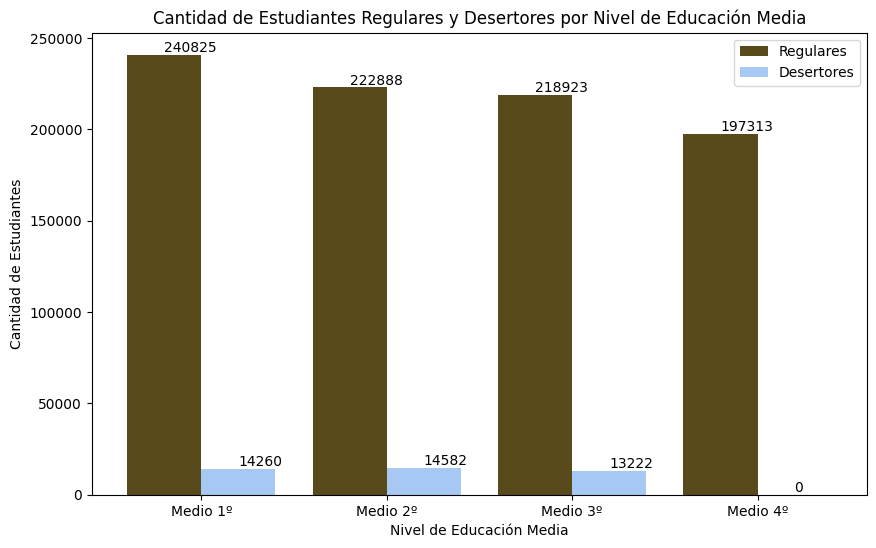

In [81]:


def identificar_desertores_sistema_regular(df_anterior, df_posterior):
    # Filtrar los estudiantes que no son prebásica o de educación para adultos
    desertores = df_anterior[(~df_anterior['COD_ENSE2'].isin([1, 3, 4, 6, 8]))]
    # print("Estudiantes regulares sin prebasica y adultos año anterior",desertores.shape)


    # Filtrar los estudiantes que no asisten a 4to medio el año a analizar
    desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]
    # print("Desertores sin 4to medio año anterior", desertores.shape)

    # Filtrar a los estudiantes df_posterior que no están en 'COD_ENSE2' 1, 3, 4, 6 y 8
    df_posterior = df_posterior[(~df_posterior['COD_ENSE2'].isin([1, 3, 4, 6, 8]))]
    # print("Estudiantes sistema regular año posterior",df_posterior.shape)

    # Verificar si los estudiantes están presentes en el archivo actual
    desertores = desertores[~desertores['MRUN'].isin(df_posterior['MRUN'].unique())]
    # print("Desertores año a analizar", desertores.shape)
    
    # Estudiantes que se mantienen en el sistema regular
    estudiantes_regulares = df_posterior[df_posterior['MRUN'].isin(df_anterior['MRUN'].unique())]
    # print("Estudiantes regulares año a analizar", estudiantes_regulares.shape)


    # Devolver el resultado como DataFrame de Pandas
    # return desertores

    # Sexo DataFrame
    df_genero = pd.DataFrame()
    print('Sexo', df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    df_genero['Sexo'] = ['Sin información', 'Hombre', 'Mujer']
    df_genero['Cantidad A. Regulares'] = [((estudiantes_regulares['GEN_ALU'] == 0).sum()), 
                          ((estudiantes_regulares['GEN_ALU'] == 1).sum()), 
                          ((estudiantes_regulares['GEN_ALU'] == 2).sum())]
    df_genero['Porcentaje A. Regulares'] = [((estudiantes_regulares['GEN_ALU'] == 0).sum()) / len(estudiantes_regulares) * 100,
                            ((estudiantes_regulares['GEN_ALU'] == 1).sum()) / len(estudiantes_regulares) * 100,
                            ((estudiantes_regulares['GEN_ALU'] == 2).sum()) / len(estudiantes_regulares) * 100]
    df_genero['Cantidad A. Desertores'] = [((desertores['GEN_ALU'] == 0).sum()), 
                          ((desertores['GEN_ALU'] == 1).sum()), 
                          ((desertores['GEN_ALU'] == 2).sum())]
    df_genero['Porcentaje A. Desertores'] = [((desertores['GEN_ALU'] == 0).sum()) / len(desertores) * 100,
                            ((desertores['GEN_ALU'] == 1).sum()) / len(desertores) * 100,
                            ((desertores['GEN_ALU'] == 2).sum()) / len(desertores) * 100]
    
    display(df_genero)

    # Gráfico de torta sexo
    data_pie = estudiantes_regulares["GEN_ALU"].value_counts()
    print("Gráfico de torta: Sexo alumnos regulares",df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())

    # Definir etiquetas
    labels = ['Hombre' if index == 1 else 'Mujer' if index == 2 else 'Sin información' for index in data_pie.index]

    plt.pie(data_pie, labels = labels, autopct = lambda x: f"{x:0.2f}%")
    plt.show()

    data_pie = desertores["GEN_ALU"].value_counts()
    print("Gráfico de torta: Sexo alumnos desertores",df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())

    # Definir etiquetas
    labels = ['Hombre' if index == 1 else 'Mujer' if index == 2 else 'Sin información' for index in data_pie.index]

    plt.pie(data_pie, labels = labels, autopct = lambda x: f"{x:0.2f}%")
    plt.show()

    # Rural DataFrame
    df_rural = pd.DataFrame()
    print('Rural', df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    df_rural['RURAL_RBD'] = ['Urbano', 'Rural']
    df_rural['Cantidad A. Regulares'] = [((estudiantes_regulares['RURAL_RBD'] == 0).sum()), 
                          ((estudiantes_regulares['RURAL_RBD'] == 1).sum())] 
    df_rural['Porcentaje A. Regulares'] = [((estudiantes_regulares['RURAL_RBD'] == 0).sum()) / len(estudiantes_regulares) * 100,
                            ((estudiantes_regulares['RURAL_RBD'] == 1).sum()) / len(estudiantes_regulares) * 100]
    df_rural['Cantidad A. Desertores'] = [((desertores['RURAL_RBD'] == 0).sum()), 
                          ((desertores['RURAL_RBD'] == 1).sum())]
    df_rural['Porcentaje A. Desertores'] = [((desertores['RURAL_RBD'] == 0).sum()) / len(desertores) * 100,
                            ((desertores['RURAL_RBD'] == 1).sum()) / len(desertores) * 100]
    
    display(df_rural)

    # Gráfico de torta Rural
    data_pie = estudiantes_regulares["RURAL_RBD"].value_counts()
    print("Gráfico de torta: Ruralidad alumnos regulares",df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())

    # Definir etiquetas
    labels = ['Rural' if index == 1 else 'Urbano' for index in data_pie.index]

    plt.pie(data_pie, labels = labels, autopct = lambda x: f"{x:0.2f}%")
    plt.show()

    data_pie = desertores["RURAL_RBD"].value_counts()
    print("Gráfico de torta: Ruralidad alumnos desertores",df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())

    # Definir etiquetas
    labels = ['Rural' if index == 1 else 'Urbano' for index in data_pie.index]

    plt.pie(data_pie, labels = labels, autopct = lambda x: f"{x:0.2f}%")
    plt.show()

    # Dependencia DataFrame
    df_tipo_dependencia = pd.DataFrame()
    print('Dependencia', df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    df_tipo_dependencia['COD_DEPE'] = ['Municipal', 'Particular Subvencionado', 'Particular Pagado']
    df_tipo_dependencia['Cantidad A. Regulares'] = [((estudiantes_regulares['COD_DEPE'] == 1).sum()),
                            ((estudiantes_regulares['COD_DEPE'] == 2).sum()),
                            ((estudiantes_regulares['COD_DEPE'] == 3).sum())]
    df_tipo_dependencia['Porcentaje A. Regulares'] = [((estudiantes_regulares['COD_DEPE'] == 1).sum()) / len(estudiantes_regulares) * 100,
                            ((estudiantes_regulares['COD_DEPE'] == 2).sum()) / len(estudiantes_regulares) * 100,
                            ((estudiantes_regulares['COD_DEPE'] == 3).sum()) / len(estudiantes_regulares) * 100]
    df_tipo_dependencia['Cantidad A. Desertores'] = [((desertores['COD_DEPE'] == 1).sum()),
                            ((desertores['COD_DEPE'] == 2).sum()),
                            ((desertores['COD_DEPE'] == 3).sum())]
    df_tipo_dependencia['Porcentaje A. Desertores'] = [((desertores['COD_DEPE'] == 1).sum()) / len(desertores) * 100,
                            ((desertores['COD_DEPE'] == 2).sum()) / len(desertores) * 100,
                            ((desertores['COD_DEPE'] == 3).sum()) / len(desertores) * 100]
    
    display(df_tipo_dependencia)

    # Diccionario de categorías
    categorias = {
    1: 'Municipal',
    2: 'DAEM',
    3: 'Part. Sub.',
    4: 'P. P.',
    5: 'Adm. delegada',
    6: 'SLEP'
}

    # Colores
    colores = ['#A7C8F2', '#C9DFF2', '#594A1C', '#F2D377', '#BF895A', '#FFBB73']

    # Gráfico de alumnos regulares
    obs_categoria = estudiantes_regulares["COD_DEPE"].value_counts()
    print("Alumnos regulares:", df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    plt.bar(x = [categorias[i] for i in obs_categoria.index], height=obs_categoria, color=colores)
    plt.xlabel("Tipo de dependencia")
    plt.ylabel("Cantidad de estudiantes")
    plt.show()

    # Gráfico de alumnos desertores
    obs_categoria = desertores["COD_DEPE"].value_counts()
    print("Alumnos desertores:", df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    plt.bar(x = [categorias[i] for i in obs_categoria.index], height=obs_categoria, color=colores)
    plt.xlabel("Tipo de dependencia")
    plt.ylabel("Cantidad de estudiantes")
    plt.show()

    # Nuevo DataFrame Tipo de enseñanza agrupados
    df_ense = pd.DataFrame()
    print('Tipo de enseñanza agrupados', df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    df_ense['COD_ENSE2'] = ['Básica', 'Media CH', 'Media TP y Art']

    # Cálculo de las cantidades y porcentajes de alumnos regulares para cada tipo de enseñanza
    for ensenanza, nombre in zip([2, 5, 7], ['Básica', 'Media CH', 'Media TP y Art']):
        df_ense.loc[df_ense['COD_ENSE2'] == nombre, 'Cantidad A. Regulares'] = (estudiantes_regulares['COD_ENSE2'] == ensenanza).sum()
        df_ense.loc[df_ense['COD_ENSE2'] == nombre, 'Porcentaje A. Regulares'] = (estudiantes_regulares['COD_ENSE2'] == ensenanza).sum() / len(estudiantes_regulares) * 100

    # Cálculo de las cantidades y porcentajes de alumnos desertores para cada tipo de enseñanza
    for ensenanza, nombre in zip([2, 5, 7], ['Básica', 'Media CH', 'Media TP y Art']):
        df_ense.loc[df_ense['COD_ENSE2'] == nombre, 'Cantidad A. Desertores'] = (desertores['COD_ENSE2'] == ensenanza).sum()
        df_ense.loc[df_ense['COD_ENSE2'] == nombre, 'Porcentaje A. Desertores'] = (desertores['COD_ENSE2'] == ensenanza).sum() / len(desertores) * 100

    display(df_ense)

    # Diccionario de categorías enseñanza
    categorias_ense = {
        2: 'Básica',
        5: 'Media CH',
        7: 'Media TP y Artística'
    }

    # Colores
    colores = ['#A7C8F2', '#C9DFF2', '#594A1C']

    # Gráfico de alumnos regulares
    print("Alumnos regulares:", df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    plt.bar(x = df_ense['COD_ENSE2'], height=df_ense['Cantidad A. Regulares'], color=colores, tick_label=df_ense['COD_ENSE2'].replace(categorias_ense))
    plt.xlabel("Tipo de enseñanza")
    plt.ylabel("Cantidad de estudiantes")
    plt.show()

    # Gráfico de alumnos desertores
    print("Alumnos desertores:", df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    plt.bar(x = df_ense['COD_ENSE2'], height=df_ense['Cantidad A. Desertores'], color=colores, tick_label=df_ense['COD_ENSE2'].replace(categorias_ense))
    plt.xlabel("Tipo de enseñanza")
    plt.ylabel("Cantidad de estudiantes")
    plt.show()

    print('Estudiantes Educación Básica', df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())

    # Filtrar estudiantes de educación básica en ambos DataFrames
    regulares_basica = estudiantes_regulares[(estudiantes_regulares['COD_ENSE2'] == 2) & (estudiantes_regulares['COD_GRADO'].between(1, 8))]
    desertores_basica = desertores[(desertores['COD_ENSE2'] == 2) & (desertores['COD_GRADO'].between(1, 8))]

    # Crear un diccionario para mapear los códigos de grado a sus nombres correspondientes
    grados = {
        1: '1º',
        2: '2º',
        3: '3º',
        4: '4º',
        5: '5º',
        6: '6º',
        7: '7º',
        8: '8º'
    }

    # Inicializar un DataFrame vacío
    df_basica = pd.DataFrame()

    # Recorrer cada grado
    for i in range(1, 9):
        # Filtrar estudiantes y desertores de cada grado
        estudiantes_basica_grado = regulares_basica[regulares_basica['COD_GRADO'] == i]
        desertores_basica_grado = desertores_basica[desertores_basica['COD_GRADO'] == i]

        # Crear un DataFrame temporal para este grado
        df_temp = pd.DataFrame()
        df_temp['COD_ENSE2'] = ['Básica ' + grados[i]]
        df_temp['Cantidad A. Regulares'] = [len(estudiantes_basica_grado)] 
        df_temp['Porcentaje A. Regulares'] = [len(estudiantes_basica_grado) / len(estudiantes_regulares) * 100 if len(estudiantes_regulares) > 0 else 0]
        df_temp['Cantidad A. Desertores'] = [len(desertores_basica_grado)]
        df_temp['Porcentaje A. Desertores'] = [len(desertores_basica_grado) / len(desertores) * 100 if len(desertores) > 0 else 0]

        # Agregar el DataFrame temporal al DataFrame final
        df_basica = pd.concat([df_basica, df_temp], ignore_index=True)

    display(df_basica)

    # Colores
    colores = ['#A7C8F2', '#C9DFF2', '#594A1C', '#F2D377', '#BF895A', '#FFBB73', '#F28500', '#F20056']

    # Gráfico de estudiantes regulares
    plt.figure(figsize=(10, 6))
    plt.bar(x = df_basica['COD_ENSE2'], height=df_basica['Cantidad A. Regulares'], color=colores)
    plt.xlabel("Grado")
    plt.ylabel("Cantidad de estudiantes regulares")
    plt.title("Estudiantes regulares en educación básica")
    plt.show()

    # Gráfico de desertores
    plt.figure(figsize=(10, 6))
    plt.bar(x = df_basica['COD_ENSE2'], height=df_basica['Cantidad A. Desertores'], color=colores)
    plt.xlabel("Grado")
    plt.ylabel("Cantidad de desertores")
    plt.title("Desertores en educación básica")
    plt.show()

    # Filtrar estudiantes de educación media en ambos DataFrames
    regulares_media = estudiantes_regulares[(estudiantes_regulares['COD_ENSE2'].isin([5, 7])) & (estudiantes_regulares['COD_GRADO'].between(1, 4))]
    desertores_media = desertores[(desertores['COD_ENSE2'].isin([5,7])) & (desertores['COD_GRADO'].between(1, 4))]


    # Crear un diccionario para mapear los códigos de grado a sus nombres correspondientes
    grados = {
        1: '1º',
        2: '2º',
        3: '3º',
        4: '4º'
    }

    # Inicializar un DataFrame vacío
    df_media = pd.DataFrame()

     # Recorrer cada grado
    for i in range(1, 5):
        # Filtrar estudiantes y desertores de cada grado
        estudiantes_media_grado = regulares_media[regulares_media['COD_GRADO'] == i]
        desertores_mediaa_grado = desertores_media[desertores_media['COD_GRADO'] == i]

        # Crear un DataFrame temporal para este grado
        df_temp = pd.DataFrame()
        df_temp['COD_ENSE2'] = ['Medio ' + grados[i]]
        df_temp['Cantidad A. Regulares'] = [len(estudiantes_media_grado)] 
        df_temp['Porcentaje A. Regulares'] = [len(estudiantes_media_grado) / len(estudiantes_regulares) * 100 if len(estudiantes_regulares) > 0 else 0]
        df_temp['Cantidad A. Desertores'] = [len(desertores_mediaa_grado)]
        df_temp['Porcentaje A. Desertores'] = [len(desertores_mediaa_grado) / len(desertores) * 100 if len(desertores) > 0 else 0]

        # Agregar el DataFrame temporal al DataFrame final
        df_media = pd.concat([df_media, df_temp], ignore_index=True)

    display(df_media)


    # Crear una lista con los grados
    grados = df_media['COD_ENSE2']

    # Crear una lista con las cantidades de alumnos regulares y desertores
    regulares = df_media['Cantidad A. Regulares']
    desertores = df_media['Cantidad A. Desertores']

    # Definir la ubicación de las etiquetas del eje x
    x = np.arange(len(grados))

    # Crear los gráficos de barras
    plt.figure(figsize=(10,6))
    bar1 = plt.bar(x - 0.2, regulares, 0.4, color='#594A1C', label='Regulares')
    bar2 = plt.bar(x + 0.2, desertores, 0.4, color='#a7c8f2', label='Desertores')

    # Colocar las etiquetas del eje x
    plt.xticks(x, grados)

    # Colocar la leyenda
    plt.legend()

    # Colocar las etiquetas en las barras
    for bar in bar1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval,
                int(yval), va='bottom')

    for bar in bar2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval,
                int(yval), va='bottom')

    # Colocar los títulos y etiquetas de los ejes
    plt.title('Cantidad de Estudiantes Regulares y Desertores por Nivel de Educación Media')
    plt.xlabel('Nivel de Educación Media')
    plt.ylabel('Cantidad de Estudiantes')

    # Mostrar el gráfico
    plt.show()










identificar_desertores_sistema_regular(m2018, m2019)

# 2019 - 2020

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/2883348386.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/2883348386.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2020 = pd.read_csv('data/matriculas/2020/m2020.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3710420452.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Sexo [2019] - [2020]


,Sexo,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Sin información,5,0.000175,0,0.000000
1,Hombre,1461326,51.039225,43532,56.817678
2,Mujer,1401812,48.960600,33085,43.182322


Gráfico de torta: Sexo alumnos regulares [2019] - [2020]


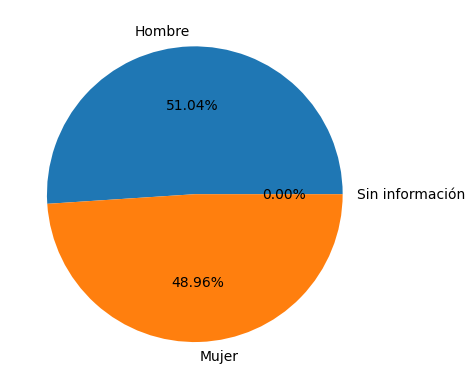

Gráfico de torta: Sexo alumnos desertores [2019] - [2020]


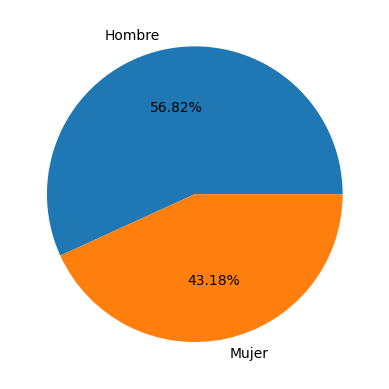

Rural [2019] - [2020]


,RURAL_RBD,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Urbano,2634170,92.00274,73079,95.382226
1,Rural,228973,7.99726,3538,4.617774


Gráfico de torta: Ruralidad alumnos regulares [2019] - [2020]


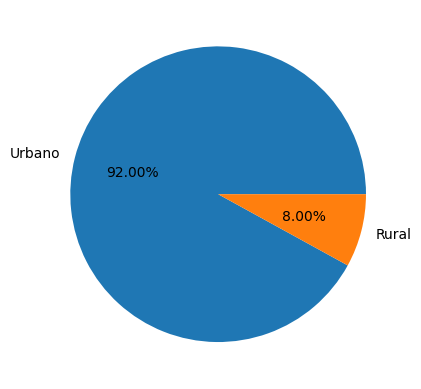

Gráfico de torta: Ruralidad alumnos desertores [2019] - [2020]


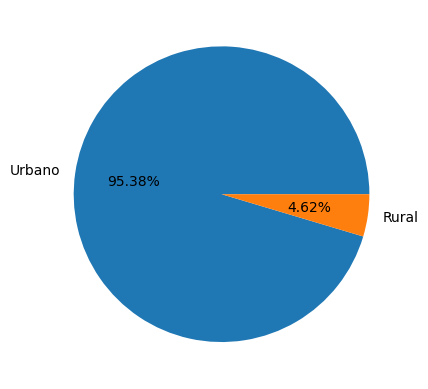

Dependencia [2019] - [2020]


,COD_DEPE,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Municipal,316500,11.054285,13957,18.216584
1,Particular Subvencionado,644602,22.513790,20160,26.312698
2,Particular Pagado,1506511,52.617386,28960,37.798400


Alumnos regulares: [2019] - [2020]


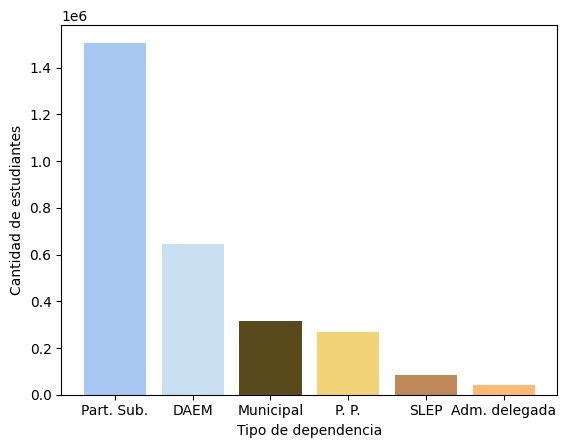

Alumnos desertores: [2019] - [2020]


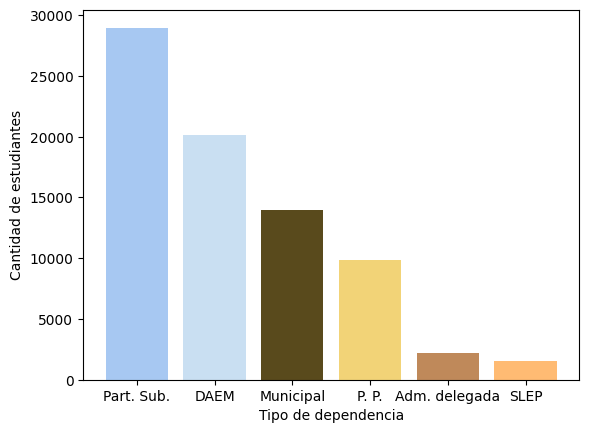

Tipo de enseñanza agrupados [2019] - [2020]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica,1973134.0,68.914965,41483.0,54.143336
1,Media CH,652438.0,22.787475,24811.0,32.383153
2,Media TP y Art,237571.0,8.297560,10323.0,13.473511


Alumnos regulares: [2019] - [2020]


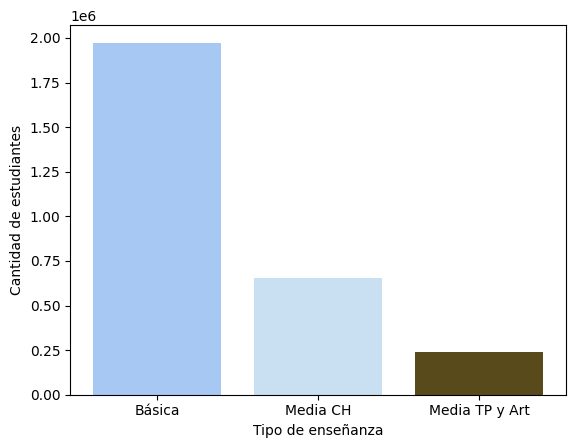

Alumnos desertores: [2019] - [2020]


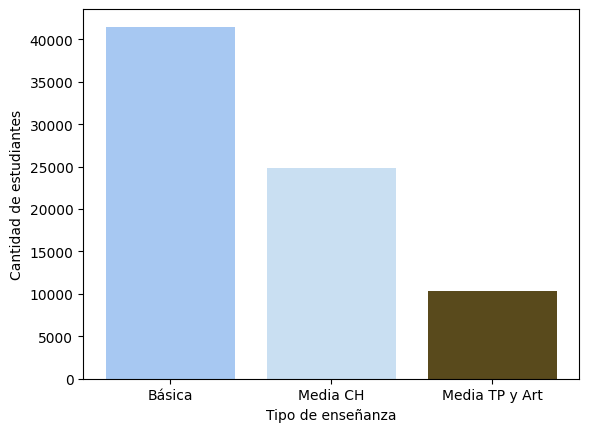

Estudiantes Educación Básica [2019] - [2020]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica 1º,230476,8.049755,5181,6.762207
1,Básica 2º,242866,8.482496,4768,6.223162
2,Básica 3º,250211,8.739033,4578,5.975175
3,Básica 4º,254367,8.884188,4141,5.404806
4,Básica 5º,254731,8.896901,4451,5.809416
5,Básica 6º,253996,8.871230,4624,6.035214
6,Básica 7º,248306,8.672497,5597,7.305167
7,Básica 8º,238181,8.318865,8143,10.628190


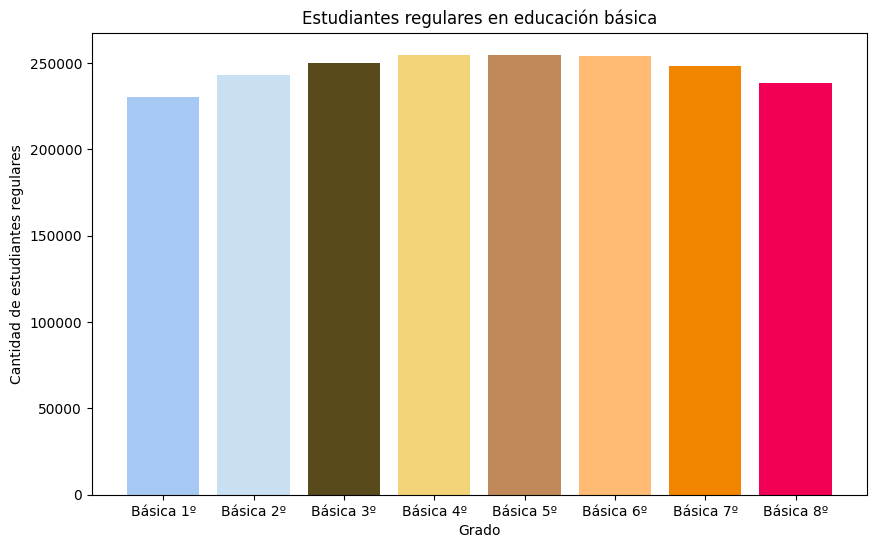

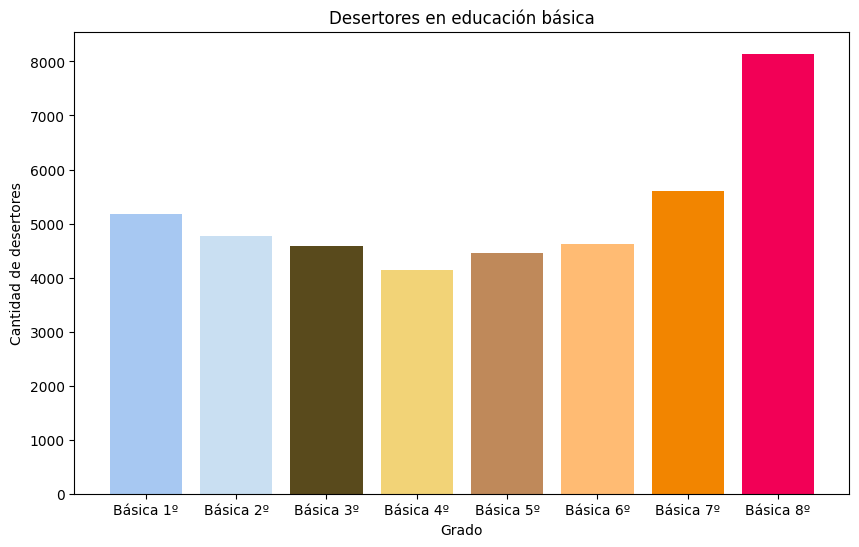

,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Medio 1º,238983,8.346876,12294,16.046047
1,Medio 2º,226590,7.914030,11288,14.733023
2,Medio 3º,217058,7.581109,11552,15.077594
3,Medio 4º,207378,7.243019,0,0.000000


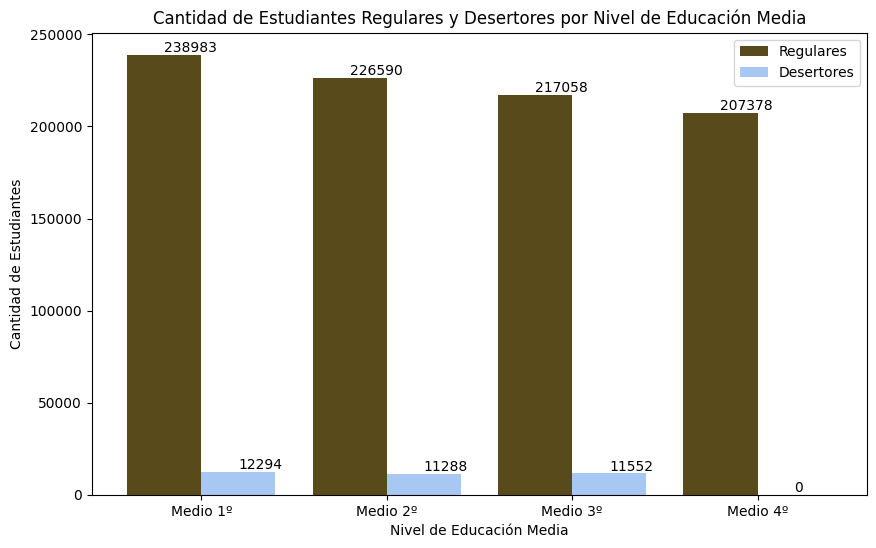

In [82]:
m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')
m2020 = pd.read_csv('data/matriculas/2020/m2020.csv', sep=';')
identificar_desertores_sistema_regular(m2019, m2020)

# 2020 - 2021

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/1283770215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2021 = pd.read_csv('data/matriculas/2021/m2021.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3710420452.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Sexo [2020] - [2021]


,Sexo,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Sin información,5,0.000173,0,0.000000
1,Hombre,1482327,51.160575,30019,58.805438
2,Mujer,1415069,48.839253,21029,41.194562


Gráfico de torta: Sexo alumnos regulares [2020] - [2021]


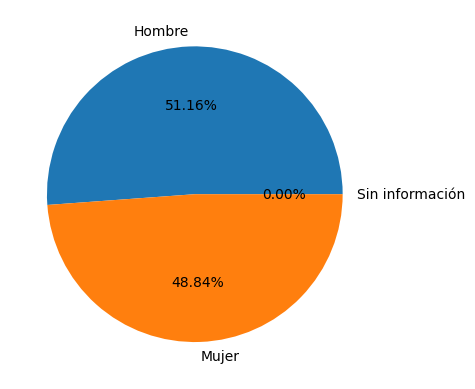

Gráfico de torta: Sexo alumnos desertores [2020] - [2021]


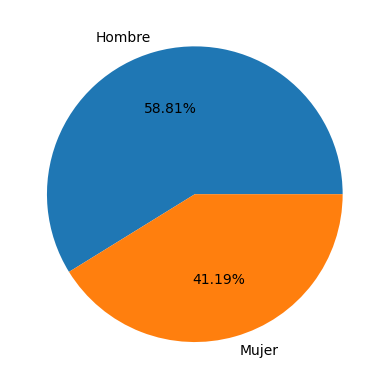

Rural [2020] - [2021]


,RURAL_RBD,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Urbano,2668826,92.111033,48647,95.296584
1,Rural,228575,7.888967,2401,4.703416


Gráfico de torta: Ruralidad alumnos regulares [2020] - [2021]


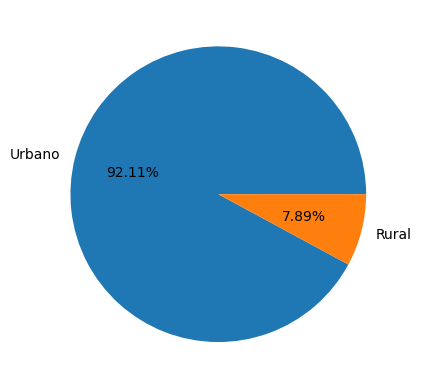

Gráfico de torta: Ruralidad alumnos desertores [2020] - [2021]


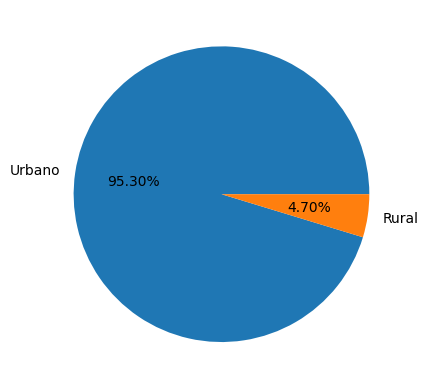

Dependencia [2020] - [2021]


,COD_DEPE,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Municipal,301601,10.409363,9364,18.343520
1,Particular Subvencionado,616118,21.264506,11962,23.432848
2,Particular Pagado,1529572,52.791174,18955,37.131719


Alumnos regulares: [2020] - [2021]


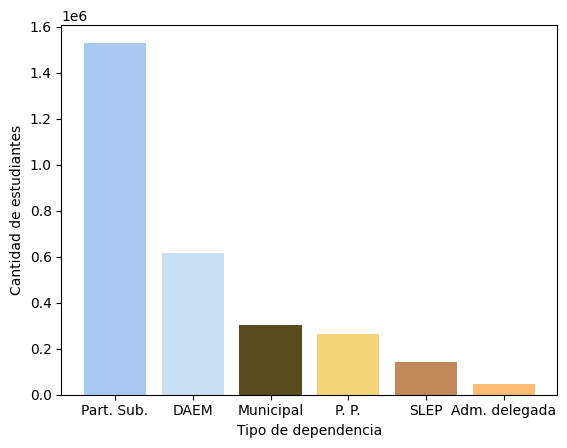

Alumnos desertores: [2020] - [2021]


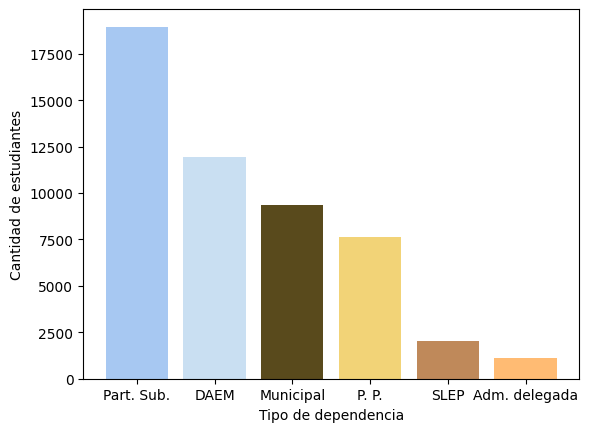

Tipo de enseñanza agrupados [2020] - [2021]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica,1984755.0,68.501219,32136.0,62.952515
1,Media CH,674185.0,23.268612,13272.0,25.999060
2,Media TP y Art,238461.0,8.230169,5640.0,11.048425


Alumnos regulares: [2020] - [2021]


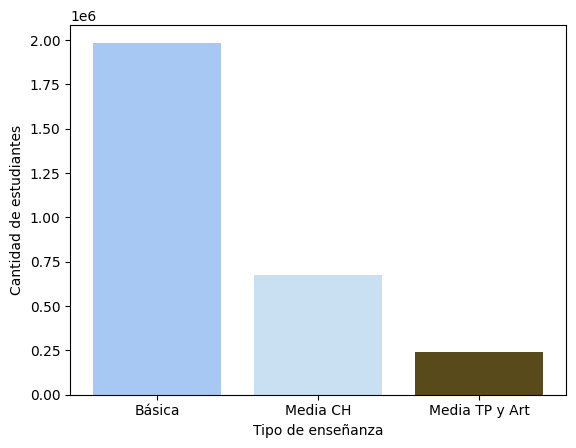

Alumnos desertores: [2020] - [2021]


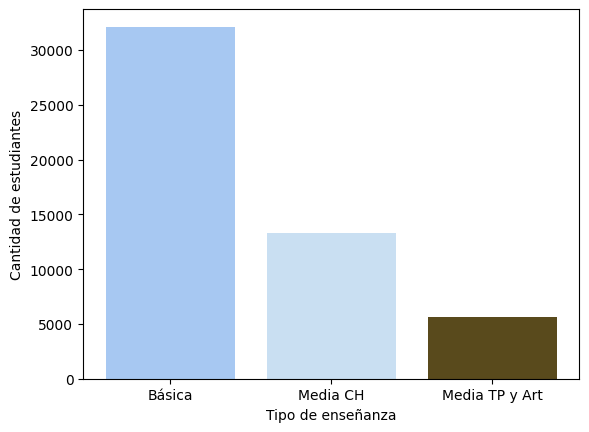

Estudiantes Educación Básica [2020] - [2021]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica 1º,237793,8.207114,4324,8.470459
1,Básica 2º,237829,8.208356,4023,7.880818
2,Básica 3º,243460,8.402703,3792,7.428303
3,Básica 4º,250798,8.655964,3583,7.018884
4,Básica 5º,255314,8.811828,3352,6.566369
5,Básica 6º,255836,8.829844,3452,6.762263
6,Básica 7º,254945,8.799093,3575,7.003213
7,Básica 8º,248780,8.586316,6035,11.822207


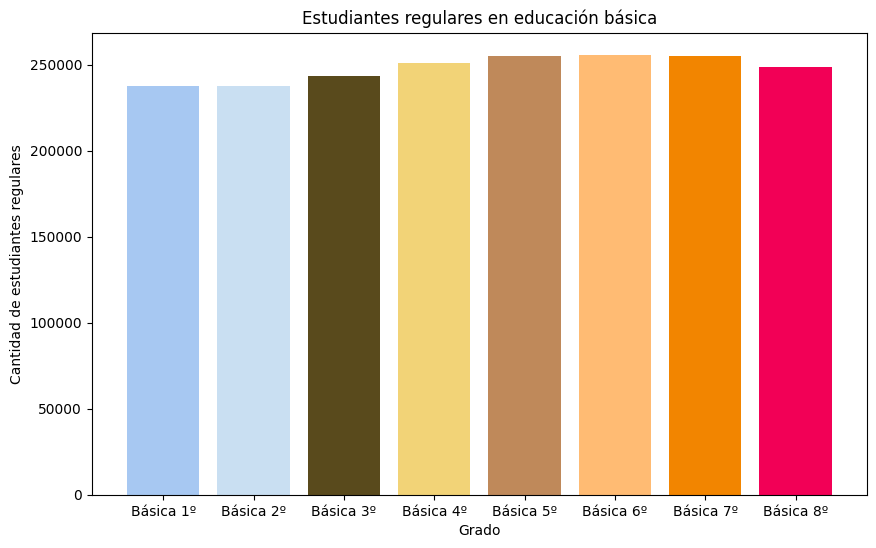

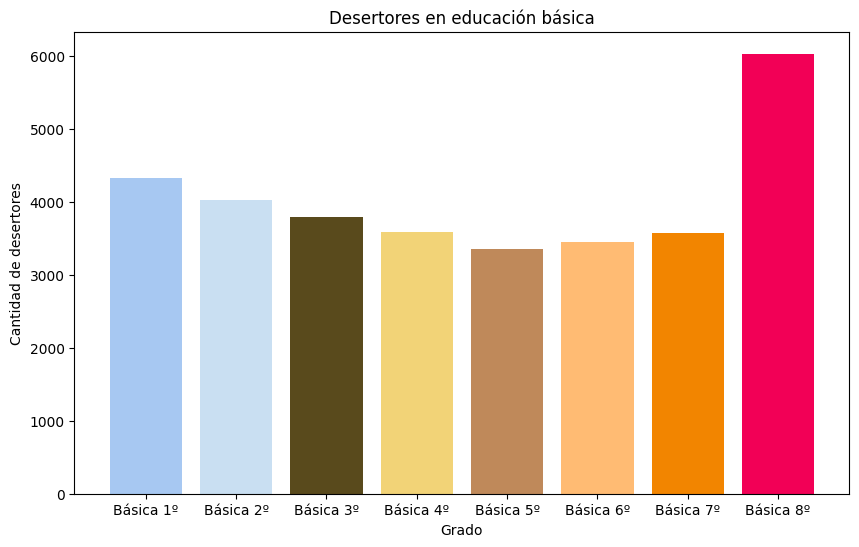

,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Medio 1º,240487,8.300094,5325,10.431359
1,Medio 2º,236191,8.151823,7006,13.724338
2,Medio 3º,224584,7.751223,6581,12.891788
3,Medio 4º,211384,7.295642,0,0.000000


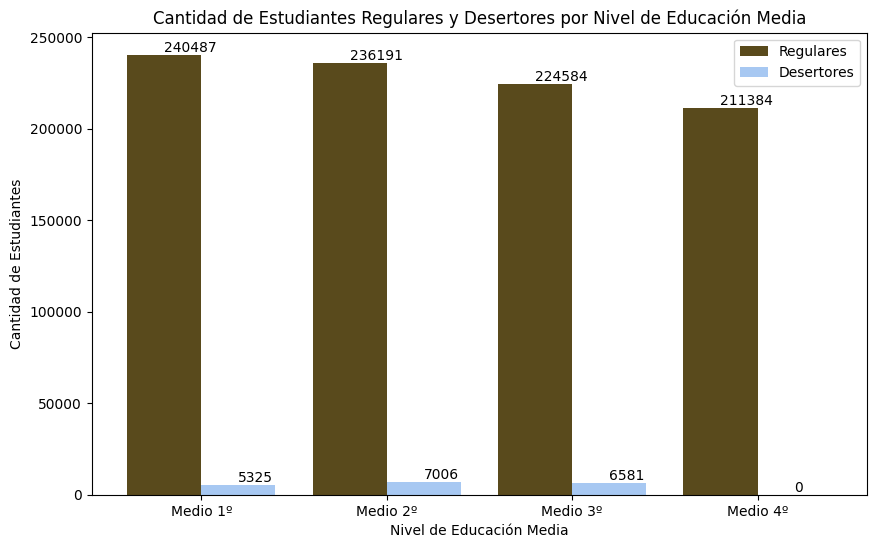

In [83]:
m2021 = pd.read_csv('data/matriculas/2021/m2021.csv', sep=';')
identificar_desertores_sistema_regular(m2020, m2021)

# 2021 - 2022

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/1503331577.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2022 = pd.read_csv('data/matriculas/2022/m2022.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3710420452.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Sexo [2021] - [2022]


,Sexo,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Sin información,5,0.000172,1,0.001442
1,Hombre,1488805,51.132041,40841,58.876699
2,Mujer,1422877,48.867787,28525,41.121859


Gráfico de torta: Sexo alumnos regulares [2021] - [2022]


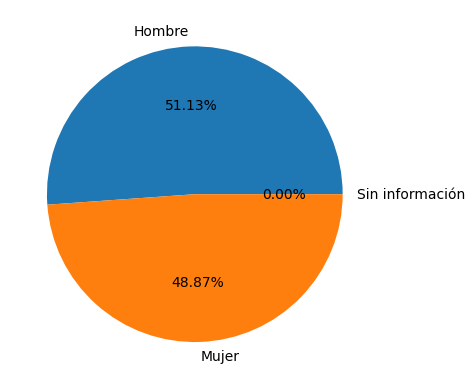

Gráfico de torta: Sexo alumnos desertores [2021] - [2022]


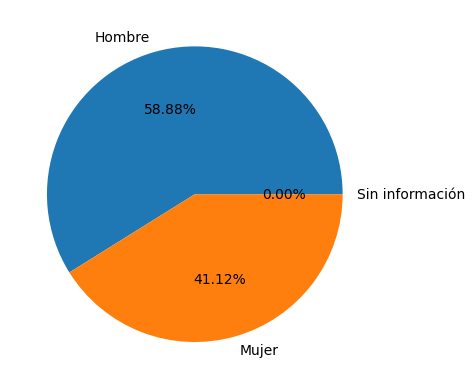

Rural [2021] - [2022]


,RURAL_RBD,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Urbano,2679277,92.018029,65341,94.196087
1,Rural,232410,7.981971,4026,5.803913


Gráfico de torta: Ruralidad alumnos regulares [2021] - [2022]


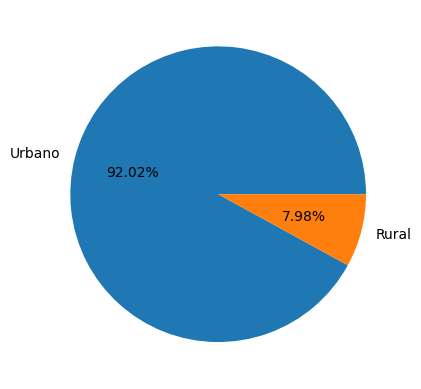

Gráfico de torta: Ruralidad alumnos desertores [2021] - [2022]


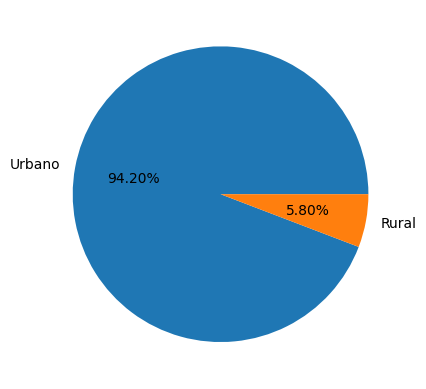

Dependencia [2021] - [2022]


,COD_DEPE,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Municipal,298400,10.248354,11938,17.209912
1,Particular Subvencionado,620776,21.320149,17302,24.942696
2,Particular Pagado,1531797,52.608574,27564,39.736474


Alumnos regulares: [2021] - [2022]


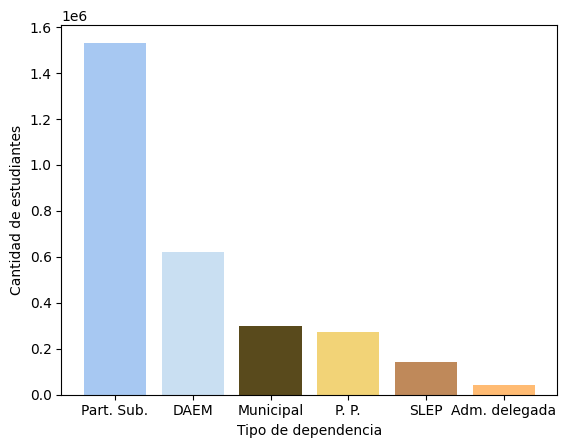

Alumnos desertores: [2021] - [2022]


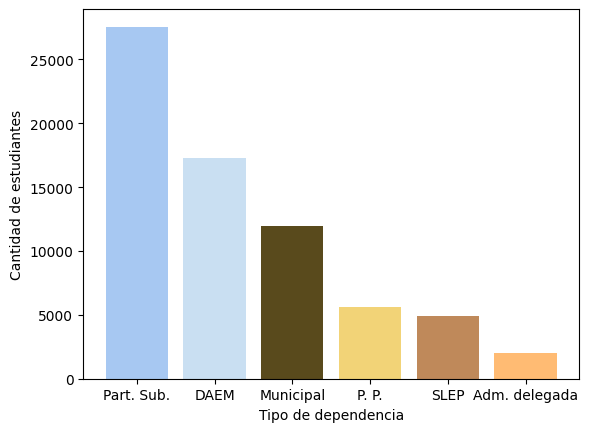

Tipo de enseñanza agrupados [2021] - [2022]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica,1983771.0,68.131327,38737.0,55.843557
1,Media CH,690770.0,23.724047,20467.0,29.505384
2,Media TP y Art,237146.0,8.144625,10163.0,14.651059


Alumnos regulares: [2021] - [2022]


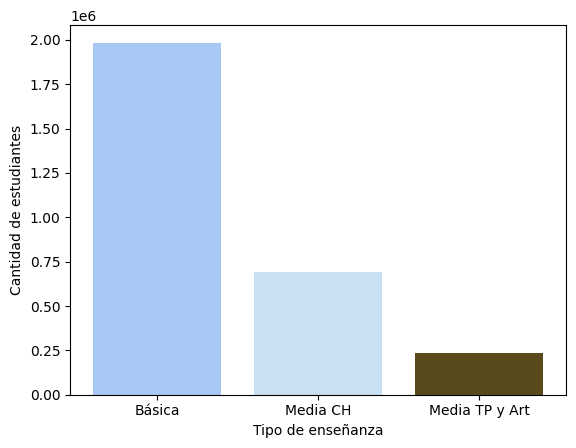

Alumnos desertores: [2021] - [2022]


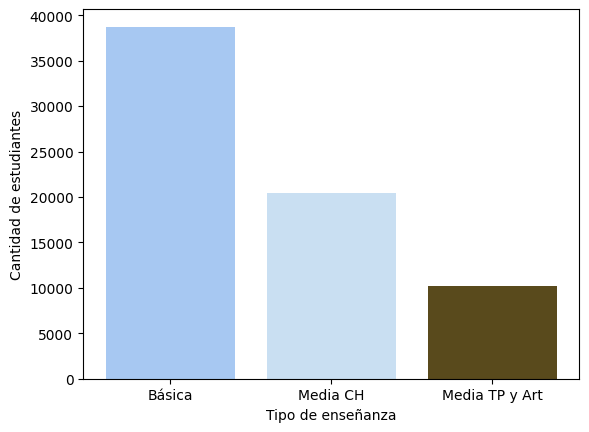

Estudiantes Educación Básica [2021] - [2022]


,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Básica 1º,234963,8.069652,4897,7.059553
1,Básica 2º,247883,8.513381,4662,6.720775
2,Básica 3º,237223,8.147270,4394,6.334424
3,Básica 4º,243469,8.361785,4225,6.090792
4,Básica 5º,251612,8.641451,4154,5.988438
5,Básica 6º,256722,8.816950,4197,6.050427
6,Básica 7º,257081,8.829280,4434,6.392088
7,Básica 8º,254818,8.751559,7774,11.207058


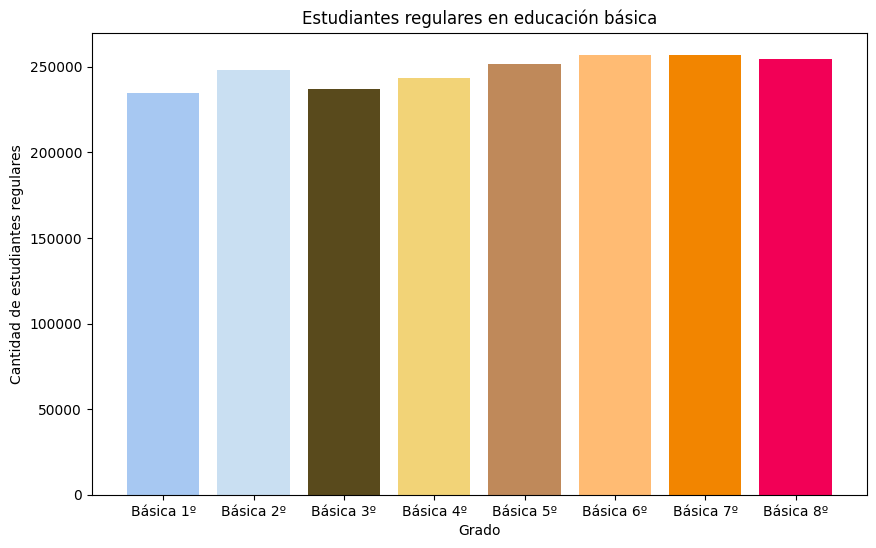

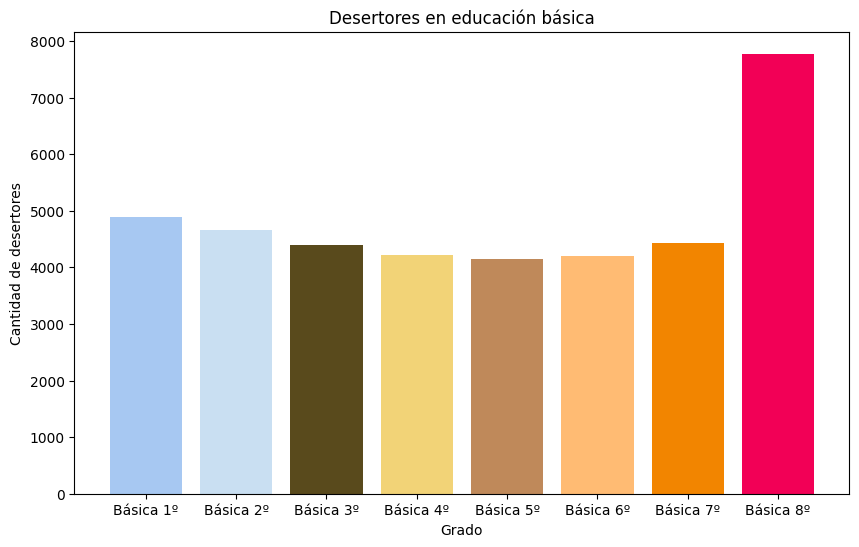

,COD_ENSE2,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Medio 1º,250980,8.619745,7609,10.969193
1,Medio 2º,235998,8.105198,11674,16.829328
2,Medio 3º,227235,7.804239,11347,16.357922
3,Medio 4º,213703,7.339491,0,0.000000


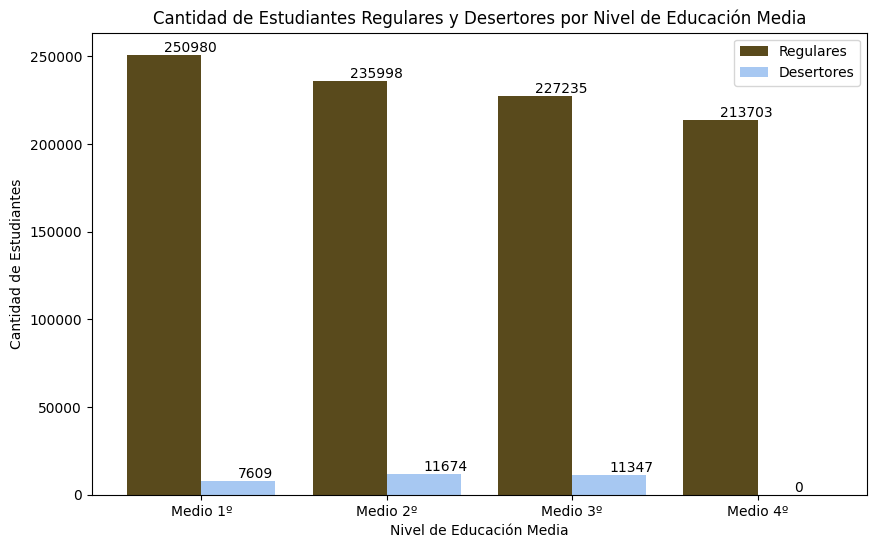

In [84]:
m2022 = pd.read_csv('data/matriculas/2022/m2022.csv', sep=';')
identificar_desertores_sistema_regular(m2021, m2022)